# Advanced Data Visualization

* Content:
  * 3d plotting
  * subplotting
  * Plotly express
  * plotly go
  * Plotly dash

## 3D plotting

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import plotly.express as px
import plotly.graph_objects as go

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

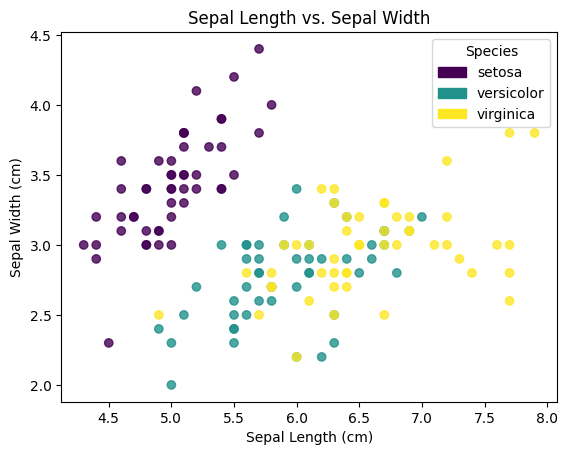

In [131]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=iris.target, alpha=0.8)
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Create custom legend
import matplotlib.patches as mpatches
legend_labels = [mpatches.Patch(color=plt.cm.viridis(i / 2), label=name) for i, name in enumerate(iris.target_names)]
plt.legend(handles=legend_labels, title="Species")

plt.show()

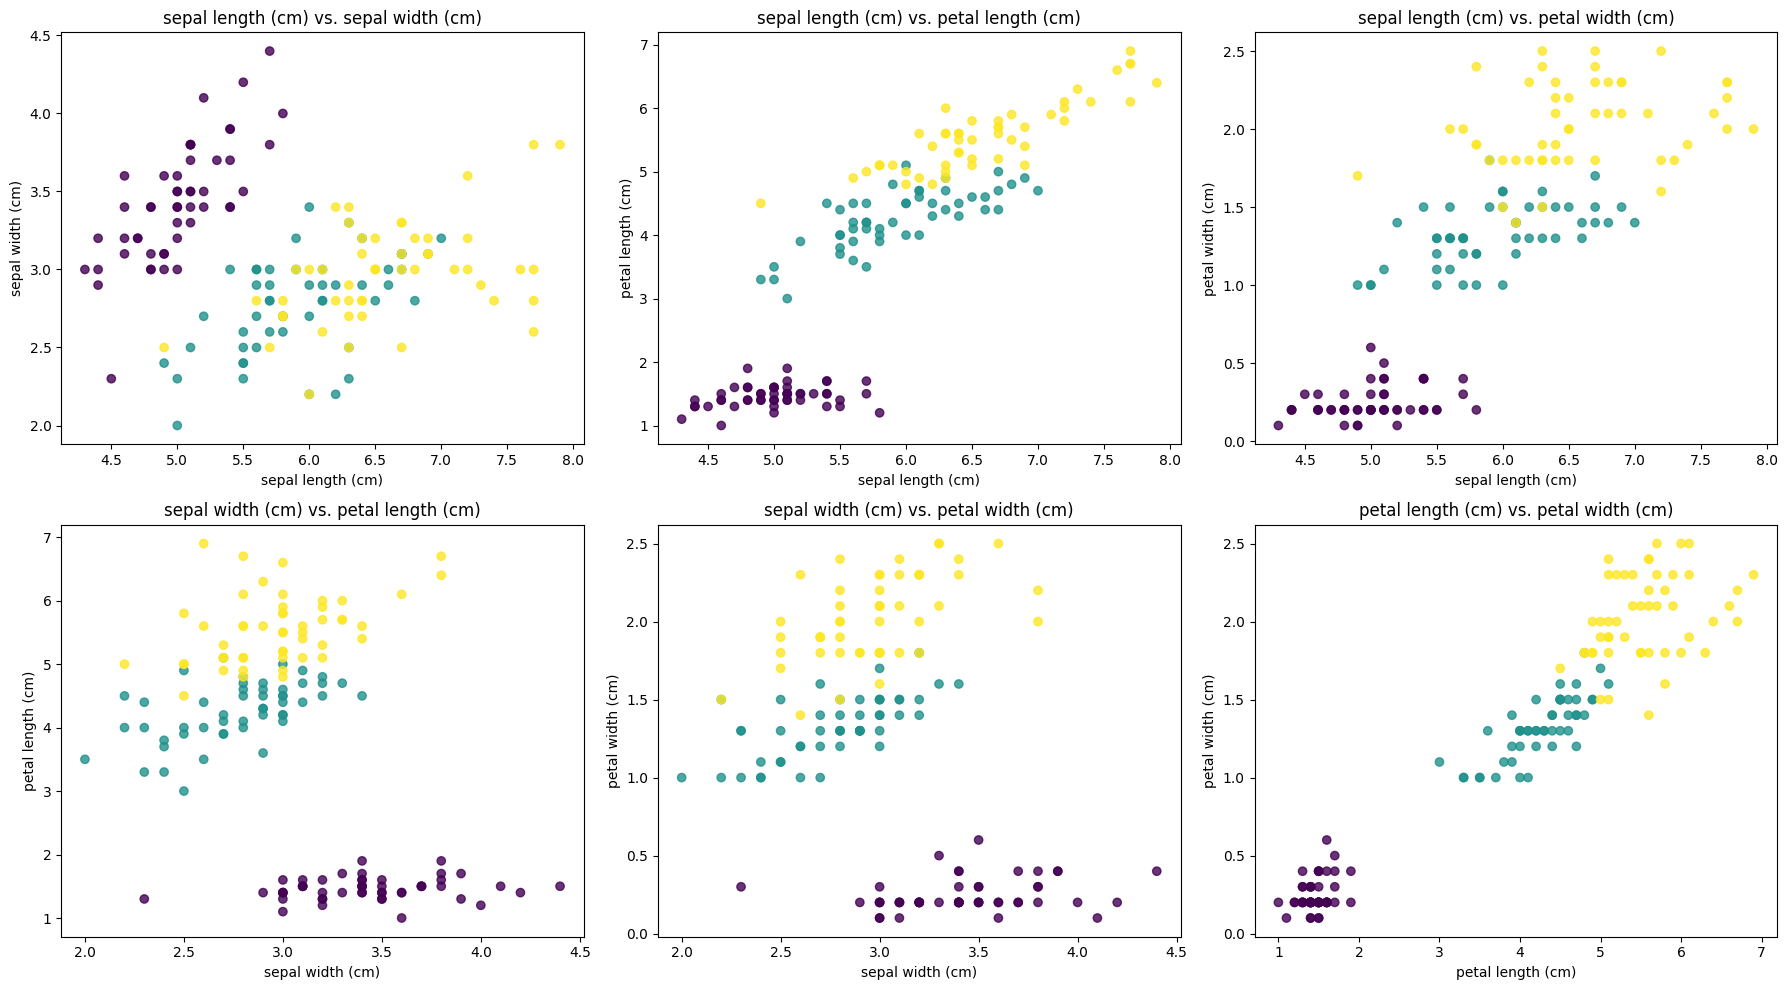

In [132]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = datasets.load_iris(as_frame=True).frame

# Define the feature pairs for the scatter plots
feature_pairs = [
    ('sepal length (cm)', 'sepal width (cm)'),
    ('sepal length (cm)', 'petal length (cm)'),
    ('sepal length (cm)', 'petal width (cm)'),
    ('sepal width (cm)', 'petal length (cm)'),
    ('sepal width (cm)', 'petal width (cm)'),
    ('petal length (cm)', 'petal width (cm)'),
]

# Create a figure with 6 subplots (2 rows by 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the feature pairs and corresponding axes
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    axes[i].scatter(df[x_feature], df[y_feature], c=iris.target, alpha=0.8, cmap='viridis')
    axes[i].set_title(f'{x_feature} vs. {y_feature}')
    axes[i].set_xlabel(x_feature)
    axes[i].set_ylabel(y_feature)

# Adjust the layout to prevent overlapping titles/labels
plt.tight_layout()

# Show plot
plt.show()


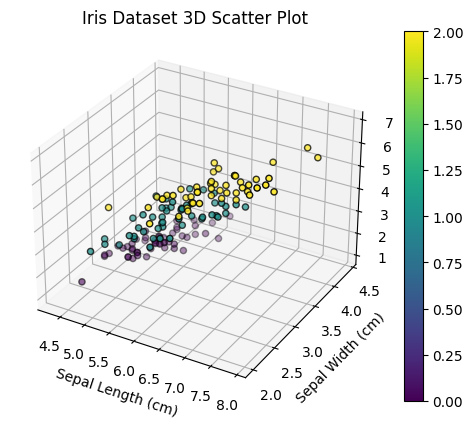

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for sepal length, sepal width, and petal length
sc = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'],
                c=iris.target, cmap='viridis', edgecolor='k')

# Labels and title
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.title('Iris Dataset 3D Scatter Plot')
plt.colorbar(sc)

plt.show()

In [134]:
# code snippet

# code script

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Plotly Express interactive 3D scatter plot
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species', title='Interactive 3D Scatter Plot of Iris Dataset',
                    labels={'species': 'Species'})

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [135]:

fig = px.line(
    df,
    x="sepal width (cm)",
    y="sepal length (cm)",
    color="species",  # Lines are colored by species
    line_group="species",  # Lines grouped by species
    markers=True,  # Adds markers to data points
    title="Line Plot of Sepal Dimensions"
)
fig.show()

In [136]:
fig = px.histogram(
    df,
    x="sepal width (cm)",
    color="species",  # Colors bars by species
    nbins=20,  # Number of bins in the histogram
    marginal="box",  # Adds a box plot on the side
    title="Histogram of Sepal Width Distribution",
    labels={"sepal_width": "Sepal Width (cm)"}
)
fig.show()

In [137]:
fig = px.pie(
    df,
    names="species",  # Defines the categories for the pie chart
    values="sepal width (cm)",  # Values determining the size of slices
    title="Pie Chart of Sepal Width by Species",
    hole=0.3,  # Creates a donut chart by adding a hole in the middle
)
fig.show()


## Plotly viz (Advanced visualization)

In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexTheAnalyst/PandasYouTubeSeries/main/world_population.csv')

In [139]:
df.sample(5)

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
158,122,PSE,Palestine,Ramallah,Asia,5.250072e+06,5.019401e+06,4.484614e+06,3.992278e+06,3.139954e+06,2124609.0,1453620.0,1118241.0,6220.0,844.0630,1.0227,0.07
143,49,NPL,Nepal,Kathmandu,Asia,3.054758e+07,2.934863e+07,2.761032e+07,2.716157e+07,2.455950e+07,19616530.0,15600442.0,12501285.0,147181.0,207.5511,1.0171,0.38
215,212,TCA,Turks and Caicos Islands,Cockburn Town,North America,4.570300e+04,4.427600e+04,3.653800e+04,2.972600e+04,1.874400e+04,11709.0,7598.0,5665.0,948.0,48.2099,1.0131,0.00
92,2,IND,India,New Delhi,Asia,1.417173e+09,1.396387e+09,1.322867e+09,1.240614e+09,1.059634e+09,NaN,NaN,557501301.0,3287590.0,431.0675,1.0068,17.77
209,233,TKL,Tokelau,Nukunonu,Oceania,1.871000e+03,1.827000e+03,1.454000e+03,1.367000e+03,1.666000e+03,1669.0,1647.0,1714.0,12.0,155.9167,1.0119,0.00


In [164]:
df.fillna(method='ffill', inplace=True)

<ipython-input-164-e9443599d05e>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [165]:
df.isnull().sum().sum()

0

In [166]:
df.drop_duplicates(inplace=True)

In [143]:
sorted_df = df.sort_values(by='2022 Population', ascending=False).reset_index()

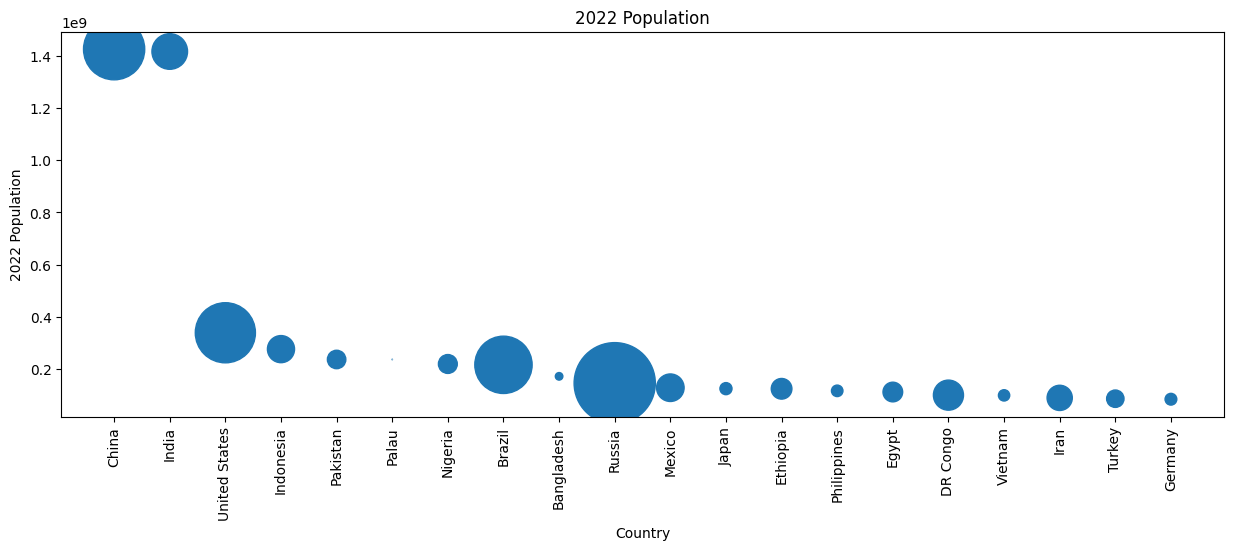

In [160]:
plt.figure(figsize=(15, 5))
plt.scatter(sorted_df['Country'][:20], sorted_df['2022 Population'][:20], s=sorted_df['Area (km²)'][:20]/5000)
plt.title("2022 Population")
plt.xlabel("Country")
plt.ylabel("2022 Population")
plt.xticks(rotation=90)
plt.show()


In [161]:

fig = px.scatter(
    sorted_df,
    x='Country',
    y='2022 Population',
    title="2022 Population",
    size='2022 Population',
    color='Continent',
    hover_name='Country',
    hover_data=['Continent'],
    size_max=60,
    )
fig.update_layout(xaxis_tickangle=-45)

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        range=[0, len(sorted_df)-1],
    )
)

fig.update_xaxes(categoryorder='array', categoryarray=sorted_df['Country'])
fig.show()

In [146]:
fig = px.treemap(
    df,
    path=[px.Constant("World Population"), 'Continent', 'Country'],
    values='2022 Population',
    title="2022  WorldWide Population",
    color_continuous_scale='Blues',

    )

fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25)
)

fig.update_traces(
    texttemplate='%{label}<br>%{value:,.0f}',
    textposition='middle center',
    hovertemplate='Population: <br>%{value:,.0f}',
)
fig.show()

In [147]:
# Create a bubble chart
fig = px.scatter(
    df,
    x='2022 Population',  # X-axis: 2022 Population
    y='Area (km²)',  # Y-axis: Area in km²
    size='Density (per km²)',  # Bubble size: Population Density
    color='Continent',  # Color by Continent
    hover_name='Country',  # Hover information: Country
    title='Bubble Chart of Population vs Area with Density Size',
    log_x=True,  # Optional: Log scale for X-axis
    log_y=True  # Optional: Log scale for Y-axis
)

fig.show()


In [148]:
# Create a sunburst chart
df = df[df['2022 Population'] > 0]
fig = px.sunburst(
    df,
    path=['Continent', 'Country'],  # Hierarchical levels: Continent -> Country
    values='2022 Population',  # Population size
    color='2022 Population',  # Color by Population
    hover_data=['2022 Population', 'Growth Rate'],  # Additional hover data
    title='Sunburst Chart of World Population by Continent and Country'
)

fig.show()


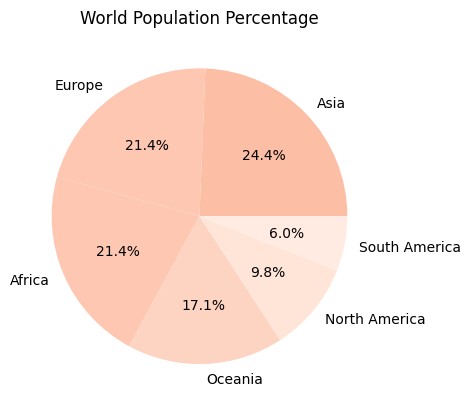

In [149]:
cont = df['Continent'].value_counts()

cmap = plt.get_cmap('Reds')
portion_list = np.round(df['Continent'].value_counts().values / df['Continent'].value_counts().sum(), 2)
colors = cmap(portion_list)

plt.pie(cont, colors=colors, labels=df['Continent'].unique(), autopct='%1.1f%%')
plt.title('World Population Percentage')
plt.show()

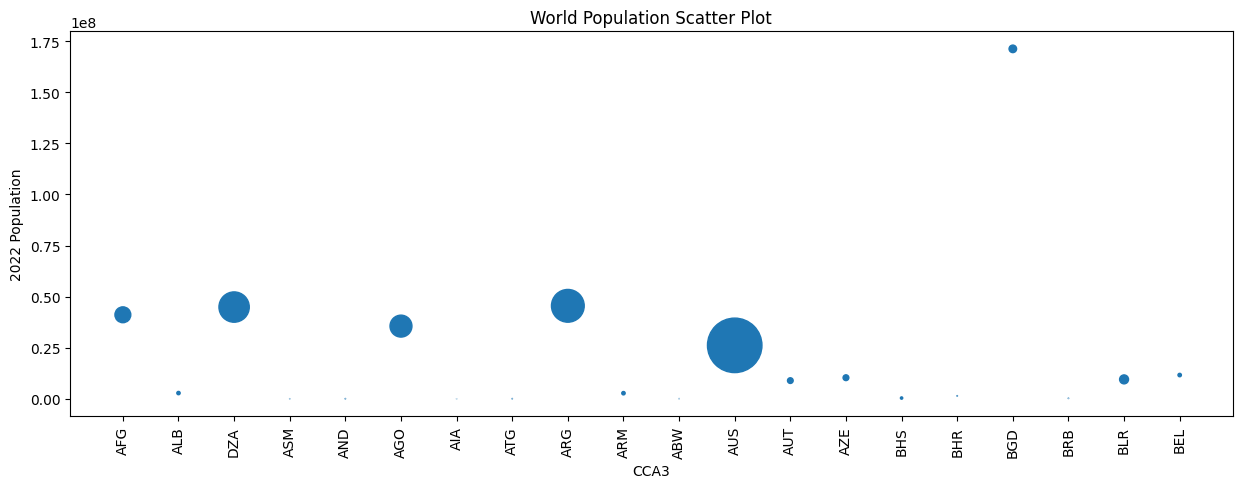

In [150]:

plt.figure(figsize=(15, 5))
plt.scatter(df['CCA3'][:20], df['2022 Population'][:20], s=df['Area (km²)'][:20]/5000)
plt.title('World Population Scatter Plot')
plt.xlabel('CCA3')
plt.ylabel('2022 Population')
plt.xticks(rotation=90)
plt.show()

# Ensure x-axis shows countries in order of global population
fig.update_xaxes(categoryorder='array', categoryarray=df['CCA3'])

In [175]:
# Select a specific country (e.g., Afghanistan)
country_data = df[df['Country'] == 'Afghanistan'].iloc[0]

# Create a gauge chart
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=country_data['Growth Rate'],
    title={'text': "Afghanistan Growth Rate"},
    gauge={'axis': {'range': [None, 3]},  # Adjust the range according to data
           'bar': {'color': "darkblue"},
           'steps': [
               {'range': [0, 1], 'color': "lightgray"},
               {'range': [1, 2], 'color': "gray"}],
           'threshold': {'line': {'color': "red", 'width': 10}, 'thickness': 0.75, 'value': 2}}
))

fig.show()


## Other diagrams

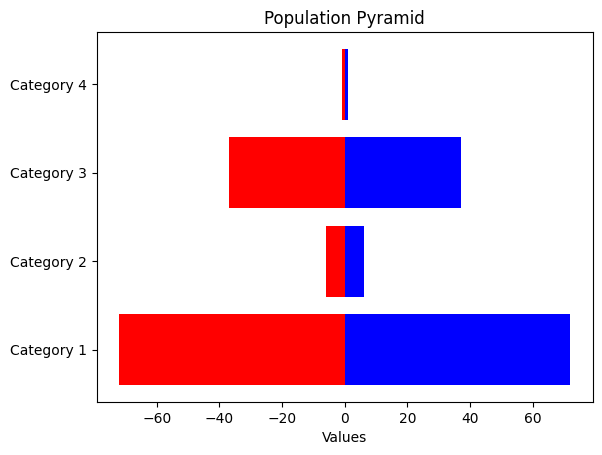

In [152]:
# Sample data
category = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
values = np.random.randint(1, 100, size=len(category))

fig, ax = plt.subplots()
ax.barh(category, values, color='blue')
ax.barh(category, -values, color='red')
ax.set_xlabel('Values')
ax.set_title('Population Pyramid')
plt.show()


In [153]:
# Example data
data = {
    'Stage': ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review'],
    'Number': [1000, 800, 600, 400, 200]
}

# Creating the funnel chart
fig = px.funnel(data, x='Number', y='Stage', title='Website Conversion Funnel')

# Updating the layout
fig.update_layout(
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    font=dict(size=12, color='black')
)

# Show the plot
fig.show()


In [154]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)
dot.render('test-output/round-table.gv', view=True)


// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}



'test-output/round-table.gv.pdf'

In [176]:
import plotly.figure_factory as ff

df = [
    dict(Task="Task 1", Start='2020-01-01', Finish='2020-02-28', Resource='Idea Phase'),
    dict(Task="Task 2", Start='2020-02-01', Finish='2020-04-15', Resource='Development Phase'),
    dict(Task="Task 3", Start='2020-04-16', Finish='2020-07-24', Resource='Testing & Deployment')
]

fig = ff.create_gantt(df)
fig.show()


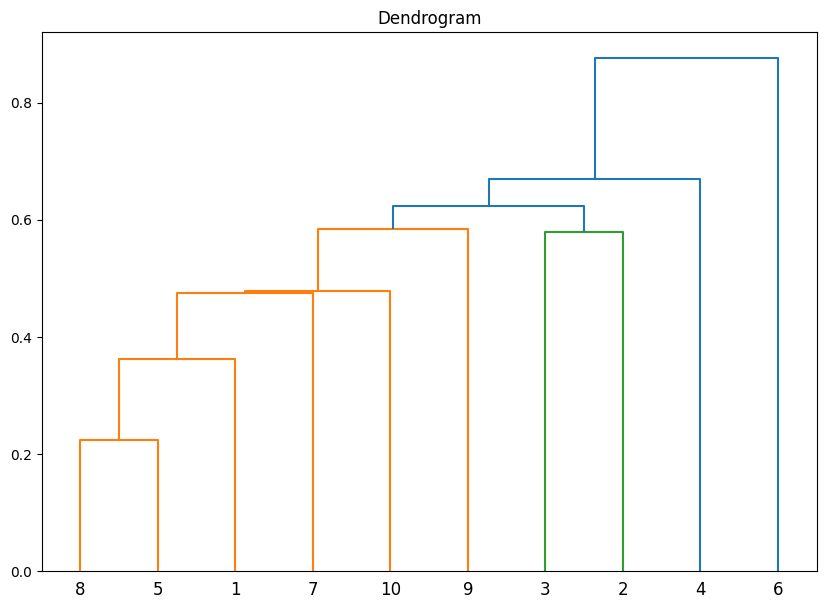

In [156]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Generate sample data
data = np.random.rand(10, 4)
linked = linkage(data, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=range(1, 11),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()


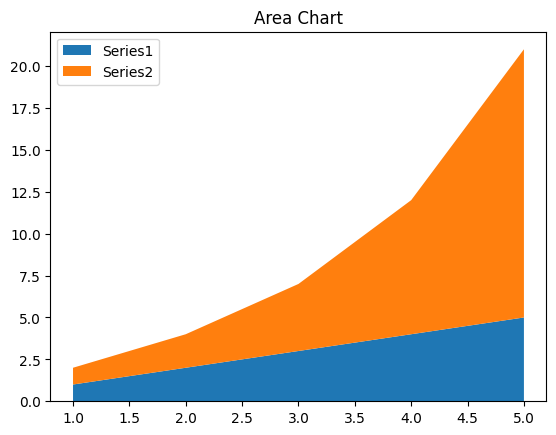

In [157]:
# Sample data
x = range(1, 6)
y = [[1, 2, 3, 4, 5], [1, 2, 4, 8, 16]]

plt.stackplot(x, y, labels=['Series1', 'Series2'])
plt.legend(loc='upper left')
plt.title('Area Chart')
plt.show()
